In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

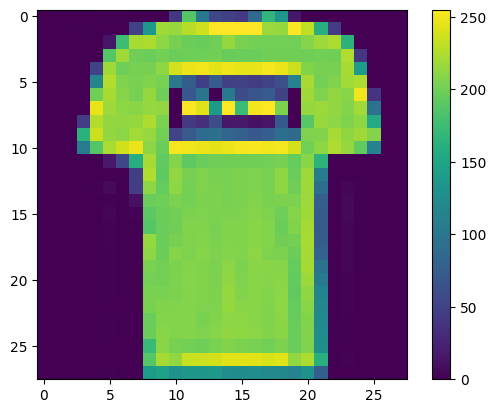

In [4]:
def show_image(image):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

show_image(train_images[1])

# Preprocessing

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Model Creation

Two steps:
- Defind the model shape/create model
- Compile the model with an optimization function and other variables

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # First layer = input layer, keras will flatten for us
    keras.layers.Dense(128, activation='relu'),  # Second layer has 128 neurons and uses relu activation function
    keras.layers.Dense(10, activation='softmax') # Last layer = output layer, has 10 neurons corresponding to 10 different classes from dataset
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit Model

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4974 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3736 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3366 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3125 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2961 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2806 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2678 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2486 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

Notice that the accuracy on the last epoch (this was written with 10 epochs, can mess around with different numbers) is higher than on the test data. This indicates that the model is over fitted.

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3353 - accuracy: 0.8848
Test accuracy: 0.8848000168800354


313/313 [==============================] - 1s 2ms/step
Ankle boot


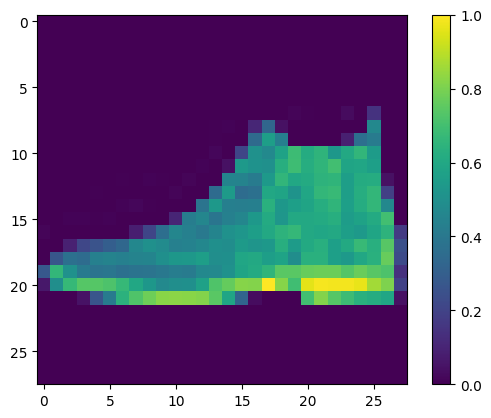

In [14]:
predictions = model.predict(test_images)

print(class_names[np.argmax(predictions[0])])
show_image(test_images[0])